# **Project Name**    - Ford Bike Sharing Project



##### **Project Type**    - EDA
##### **Contribution**    - Individual


# **Project Summary -**

This project focuses on analyzing individual bike rides made through the Ford GoBike sharing system in the San Francisco Bay Area. The primary objective of this analysis is to uncover user behavior patterns, determine key trends related to trip duration, and identify factors influencing ridership, ultimately providing actionable insights to enhance the efficiency and profitability of the bike-sharing system.

# **GitHub Link -**

[Ford Bike Sharing EDA Project](https://github.com/Sanjoglahase/ford-go-bike)

# **Problem Statement**


The Ford GoBike bike-sharing system operates across the San Francisco Bay Area, providing convenient and eco-friendly transportation. However, to optimize operations, improve user experience, and expand its reach, the company needs a deeper understanding of user behavior, trip patterns, and system usage. Without these insights, it is difficult to make data-driven decisions regarding infrastructure expansion, targeted marketing, and service improvements. This project aims to analyze historical trip data to uncover key trends, user preferences, and operational inefficiencies.

#### **Define Your Business Objective?**

1. **Analyze Trip Durations -**

 * Determine how long the average trip lasts and identify any outliers.

 * Compare trip durations across different user types and demographics.

2. **Understand Temporal Patterns -**

 * Identify peak ride hours, days, and months.

 * Explore how seasonality impacts ride frequency and duration.

3. **Segment Users Based on Behavior -**

 * Compare the behavior of subscribers and casual customers.

 * Understand how gender and age influence riding habits.

4. **Identify High-Demand Stations -**

 * Locate the most popular start and end stations.

 * Provide recommendations for station expansion or bike redistribution.

5. **Improve User Experience -**

 * Identify user groups (e.g., casual riders or underrepresented demographics) for targeted engagement.

 * Suggest enhancements to service offerings based on usage data.

6. **Support Strategic Decisions -**

 * Provide data-driven recommendations to increase ridership, reduce operational bottlenecks, and enhance customer satisfaction.



# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Load Dataset

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Function to load a CSV file into a pandas DataFrame
def load_csv(file_path):
    try:
        return pd.read_csv(file_path)  # Load the CSV file
    except Exception as e:
        print(f"Error: {e}")  # Print error message if loading fails
        return None  # Return None in case of failure

# Define file paths for the dfs
fordbike_path = '/content/drive/MyDrive/Labmentix_Internship_Projects/Ford_Bike_Sharing Project/fordgobike-tripdata.csv'  # File path for the ford-bike df
# Load the df using the load_csv function
fordbike_df = load_csv(file_path=fordbike_path)  # Load ford-bike df
# Display all columns
pd.set_option('display.max_columns', None)


Mounted at /content/drive


### Dataset First View

In [3]:
# Dataset First Look
fordbike_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
print('Number of Rows =',fordbike_df.shape[0])
print('Number of Columns =',fordbike_df.shape[1])

Number of Rows = 94802
Number of Columns = 16


### Dataset Information

In [5]:
# Dataset Info
fordbike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94802 entries, 0 to 94801
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   duration_sec             94802 non-null  int64  
 1   start_time               94802 non-null  object 
 2   end_time                 94802 non-null  object 
 3   start_station_id         94802 non-null  int64  
 4   start_station_name       94802 non-null  object 
 5   start_station_latitude   94802 non-null  float64
 6   start_station_longitude  94802 non-null  float64
 7   end_station_id           94802 non-null  int64  
 8   end_station_name         94802 non-null  object 
 9   end_station_latitude     94802 non-null  float64
 10  end_station_longitude    94802 non-null  float64
 11  bike_id                  94802 non-null  int64  
 12  user_type                94802 non-null  object 
 13  member_birth_year        86963 non-null  float64
 14  member_gender         

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
print('Number of duplicates in dataset =',fordbike_df.duplicated().sum())

Number of duplicates in dataset = 0


#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
print('Number of missing values in dataset =',fordbike_df.isnull().sum().sum())

Number of missing values in dataset = 15640


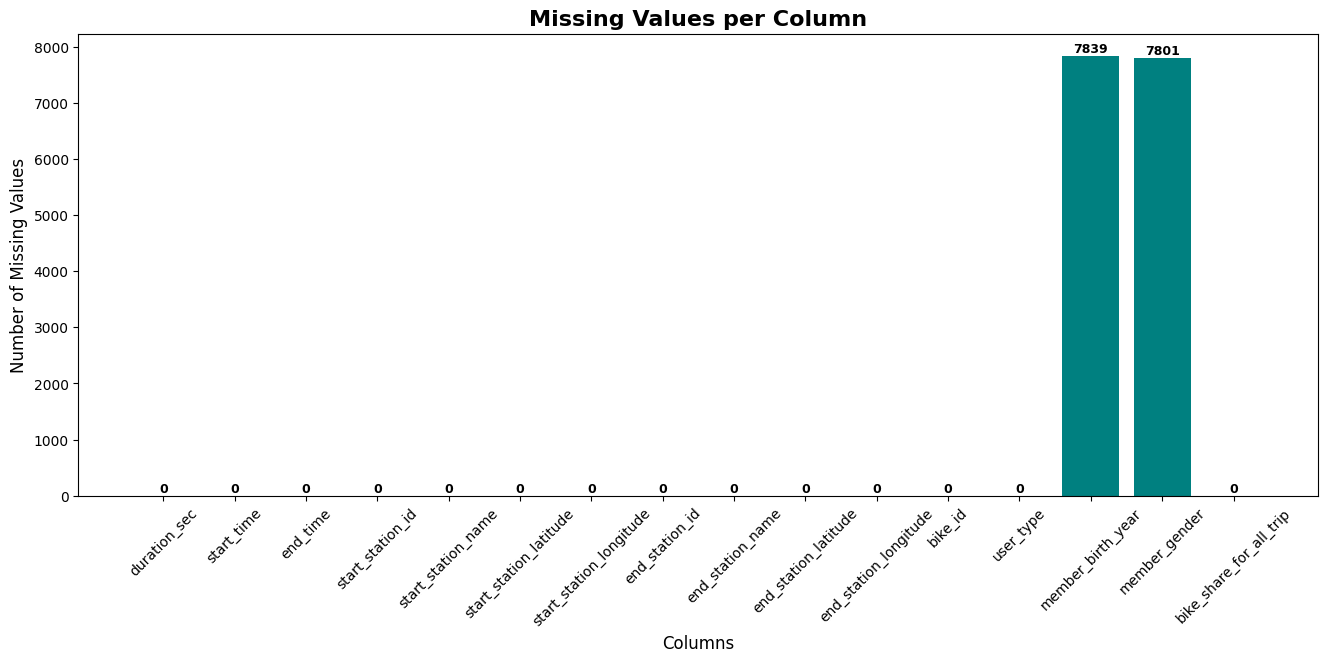

In [8]:
# Visualizing the missing values
# Calculating the number of missing values per column
missing_values = fordbike_df.isnull().sum()

# Plotting the missing values
fig, ax = plt.subplots(figsize=(16, 6))
bars = ax.bar(missing_values.index, missing_values.values, color='teal')

# Adding data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval}',
            ha='center', va='bottom', fontsize=9, fontweight='bold', color='black')

# Adding labels and title
plt.title('Missing Values per Column', fontsize=16, fontweight='bold')
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Number of Missing Values', fontsize=12)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

### What did you know about your dataset?

This dataset contains information on individual bike-sharing trips made in the greater San Francisco Bay Area. The dataset includes 94,802 entries, and it is used to analyze ride patterns, trip durations, and the influence of factors like user type, seasonality, and demographics.

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
fordbike_df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [10]:
# Dataset Describe
fordbike_df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,94802.000000,94802.000000,94802.000000,94802.000000,94802.00000,94802.000000,94802.000000,94802.000000,86963.000000
mean,870.935930,103.766302,37.773321,-122.361677,101.00982,37.773536,-122.360776,2048.751609,1980.932420
std,2550.596891,87.730464,0.085744,0.105253,86.77949,0.085552,0.104580,1091.507513,10.803017
min,61.000000,3.000000,37.317298,-122.444293,3.00000,37.317298,-122.444293,11.000000,1900.000000
25%,359.000000,30.000000,37.771662,-122.412408,27.00000,37.773063,-122.411306,1133.000000,1975.000000
50%,555.000000,79.000000,37.781270,-122.398773,76.00000,37.781752,-122.398436,2151.500000,1983.000000
75%,854.000000,160.000000,37.795392,-122.390428,157.00000,37.795392,-122.390428,3015.000000,1989.000000
max,85546.000000,342.000000,37.880222,-121.874119,342.00000,37.880222,-121.874119,3744.000000,2000.000000


### Variables Description

1. **duration_sec -** 	Duration of the trip in seconds

2. **start_time -** 	Date and time when the trip started
3. **end_time -**	Date and time when the trip ended
4. **start_station_id -**	Unique ID of the starting station
5. **start_station_name -**	Name of the starting station
6. **start_station_latitude -**	Latitude of the starting station
7. **start_station_longitude -**	Longitude of the starting station
8. **end_station_id -**	Unique ID of the ending station
9. **end_station_name -**	Name of the ending station
10. **end_station_latitude -**	Latitude of the ending station
11. **end_station_longitude -**	Longitude of the ending station
12. **bike_id -**	Unique identifier for the bike used
13. **user_type -**	Type of user Subscriber (member) or Customer (casual)
14. **member_birth_year** -	Birth year of the user
15. **member_gender -**	Gender of the user (Male, Female, or Other)
16. **bike_share_for_all_trip -**	Indicates whether the trip was part of the Bike Share for All program (Yes/No)

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
print('Unique Values in dataset:\n')
print(fordbike_df.nunique())

Unique Values in dataset:

duration_sec                4512
start_time                 94801
end_time                   94797
start_station_id             273
start_station_name           273
start_station_latitude       273
start_station_longitude      273
end_station_id               272
end_station_name             272
end_station_latitude         272
end_station_longitude        272
bike_id                     3065
user_type                      2
member_birth_year             72
member_gender                  3
bike_share_for_all_trip        2
dtype: int64


## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# Write your code to make your dataset analysis ready.

# Create copy of the dataset
df = fordbike_df.copy()

# 1. Convert start_time and end_time to datetime
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [13]:
# 2. Create new columns for date, time, and duration in minutes
df['start_date'] = df['start_time'].dt.date
df['start_hour'] = df['start_time'].dt.hour
df['start_day'] = df['start_time'].dt.day_name()
df['start_month'] = df['start_time'].dt.month_name()
df['duration_min'] = df['duration_sec'] / 60  # Convert seconds to minutes


In [14]:
# 3. Handle missing values

# Dropping rows with missing member_birth_year and member_gender
df = df.dropna(subset=['member_birth_year', 'member_gender'])

# Checking missing values after handling
print("\nMissing values after handling:")
print(df.isnull().sum())


Missing values after handling:
duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
start_date                 0
start_hour                 0
start_day                  0
start_month                0
duration_min               0
dtype: int64


In [15]:
# 4. Create age column from birth year
df['age'] = 2025 - df['member_birth_year']

In [16]:
# 5. Remove outliers in trip duration
# This helps to focus analysis on realistic trip lengths
duration_cap = df['duration_min'].quantile(0.99)
df = df[df['duration_min'] <= duration_cap]

In [17]:
# 6. Converting birth year and age to int
df['member_birth_year'] = df['member_birth_year'].astype(int)
df['age'] = df['age'].astype(int)

In [18]:
# 7. Drop irrelevant columns
df.drop(['bike_id', 'start_station_id', 'end_station_id'], axis=1, inplace=True)

In [19]:
# Dataset shape after cleaning
print('Number of Rows =',df.shape[0])
print('Number of Columns =',df.shape[1])

Number of Rows = 86093
Number of Columns = 19


In [20]:
# View final dataset
df.head()

,duration_sec,start_time,end_time,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_date,start_hour,start_day,start_month,duration_min,age
6,453,2018-01-31 23:53:53.632,2018-02-01 00:01:26.805,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,Valencia St at 24th St,37.752428,-122.420628,Subscriber,1988,Male,No,2018-01-31,23,Wednesday,January,7.55,37
7,180,2018-01-31 23:52:09.903,2018-01-31 23:55:10.807,Berry St at 4th St,37.775880,-122.393170,4th St at Mission Bay Blvd S,37.770407,-122.391198,Subscriber,1980,Male,No,2018-01-31,23,Wednesday,January,3.00,45
8,996,2018-01-31 23:34:56.004,2018-01-31 23:51:32.674,Valencia St at 24th St,37.752428,-122.420628,Cyril Magnin St at Ellis St,37.785881,-122.408915,Subscriber,1987,Male,Yes,2018-01-31,23,Wednesday,January,16.60,38
9,825,2018-01-31 23:34:14.027,2018-01-31 23:47:59.809,Ryland Park,37.342725,-121.895617,San Salvador St at 9th St,37.333955,-121.877349,Subscriber,1994,Female,Yes,2018-01-31,23,Wednesday,January,13.75,31
11,432,2018-01-31 23:34:26.484,2018-01-31 23:41:39.297,Division St at Potrero Ave,37.769218,-122.407646,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,Subscriber,1993,Male,No,2018-01-31,23,Wednesday,January,7.20,32


### What all manipulations have you done and insights you found?

### **Manipulations-**
1. **Datetime Conversions:**

 * start_time and end_time columns were converted to proper datetime formats.
 * This allowed easy extraction of time-based features.

2. **Feature Engineering:**

 * Trip Duration (duration_min) was created by subtracting start_time from end_time and converting to minutes.

 * Extracted new columns from start_time:

    * start_hour (hour of the day),

    * start_day (day of week),

    * start_month (month name),

    * start_year (year).

 * Calculated rider age from birth year.

3. **Data Type Conversion:**

 * Numerical fields like member_birth_year and age column were converted into integer datatype.

4. **Filtering Unusual Records:**

 * Trips with negative durations or extremely high durations (outliers like >24 hours) were filtered out to ensure accuracy.

5. **Handling Missing Data:**

 * Checked null values across all columns.
 * Rows with nulls in key columns like member_gender or member_birth_year were removed to maintain data quality.

---
### **Insights-**
1. **Presence of Outliers:**

 * Some records showed unrealistically high or negative trip durations, indicating the need for cleaning.

2. **Missing Demographic Data:**

 * Several records had missing gender or birth year, which could affect gender-based or age-based insights.

3. **User and Time Patterns Possible:**

 * By extracting start_hour, start_day, and start_month, patterns in riding behavior over different times and seasons became analyzable.

4. **Age Distribution Identified:**

 * Calculating age from birth year allowed for deeper analysis into age groups of riders and their preferences.

5. **Trip Duration is a Critical Metric:**

 * Creating duration_min provided the key measure to compare how trip length varies by age, gender, time of day, and user type.




## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [21]:
# Setting visualization style
plt.style.use('fivethirtyeight')

####**Univariate Analysis**

#### Chart - 1 - Distribution of Trip Duration (in minutes)

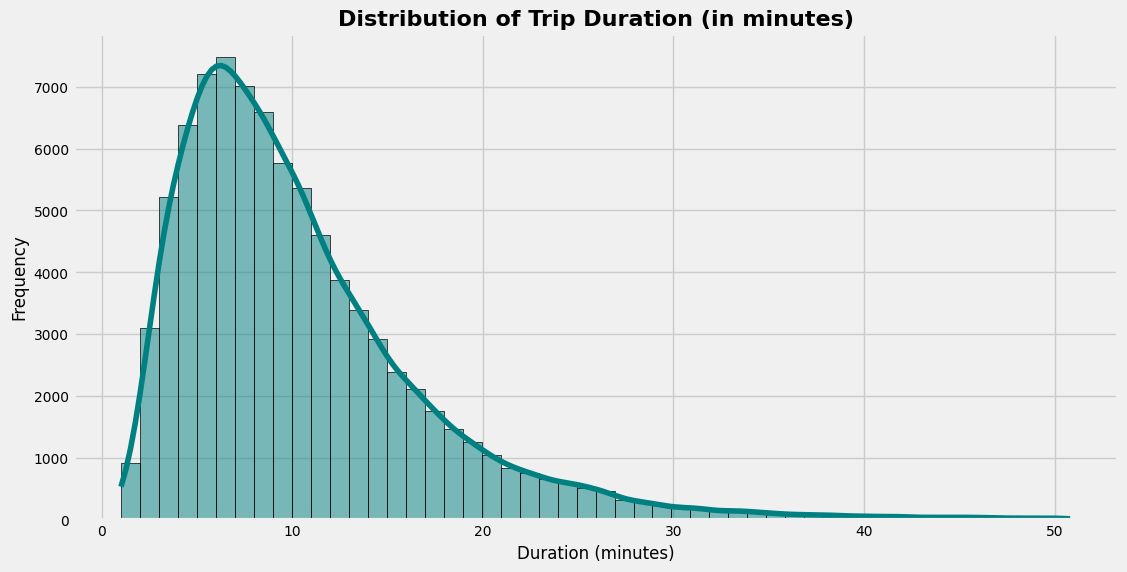

In [22]:
# Chart - 1 visualization code
# Histogram for trip duration
# Set figure size
plt.figure(figsize=(12, 6))
# Create histogram
sns.histplot(df['duration_min'], bins=50, color='teal', edgecolor='black', kde = True)
# Add labels and title
plt.title('Distribution of Trip Duration (in minutes)',fontsize = 16, fontweight='bold')
plt.xlabel('Duration (minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
# Set font size for x & y axis value
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
# Show Plot
plt.show()

##### 1. Why did you pick the specific chart?

A histogram clearly shows how trip durations are distributed, helping identify common and extreme values.

##### 2. What is/are the insight(s) found from the chart?

Most trips are short (under 20 minutes), indicating the system is used for quick commutes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Poistive Impact -**
Yes, this insight supports optimizing bike availability for short-distance riders and efficient fleet rotation.

**Negative Insight -**
No, it shows healthy usage patterns. Longer trips may need review, but not necessarily negative.

#### Chart - 2 - User Types Distribution

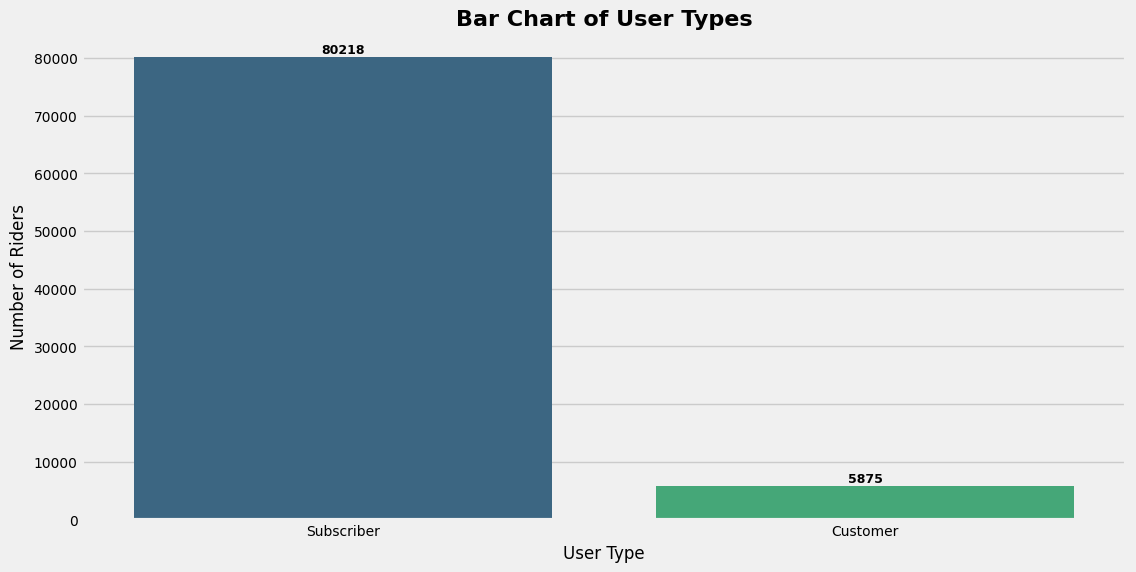

In [23]:
# Chart - 2 visualization code
# User Type Distribution
# Set figure size
plt.figure(figsize=(12, 6))
# Counting user types
user_type_counts = df['user_type'].value_counts()
# Create bar plot
sns.barplot(x=user_type_counts.index, y=user_type_counts.values, palette='viridis')
# Add data labels
for i, v in enumerate(user_type_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=9, fontweight='bold', color='black')
# Add labels and title
plt.title('Bar Chart of User Types', fontsize=16, fontweight='bold')
# Set font size for x & y axis value
plt.xlabel('User Type', fontsize=12)
plt.ylabel('Number of Riders', fontsize=12)
# Set font size for x & y axis value
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# Show plot
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is ideal to compare categorical counts such as Subscriber vs Customer.

##### 2. What is/are the insight(s) found from the chart?

Majority are Subscribers, indicating high user retention and loyalty.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact -**
Yes, strong subscriber base helps in revenue predictability and customer lifetime value.

**Negative Insight -**
No, fewer customers indicate potential for growth through short-term promotions.

#### Chart - 3 - Member Gender Distribution

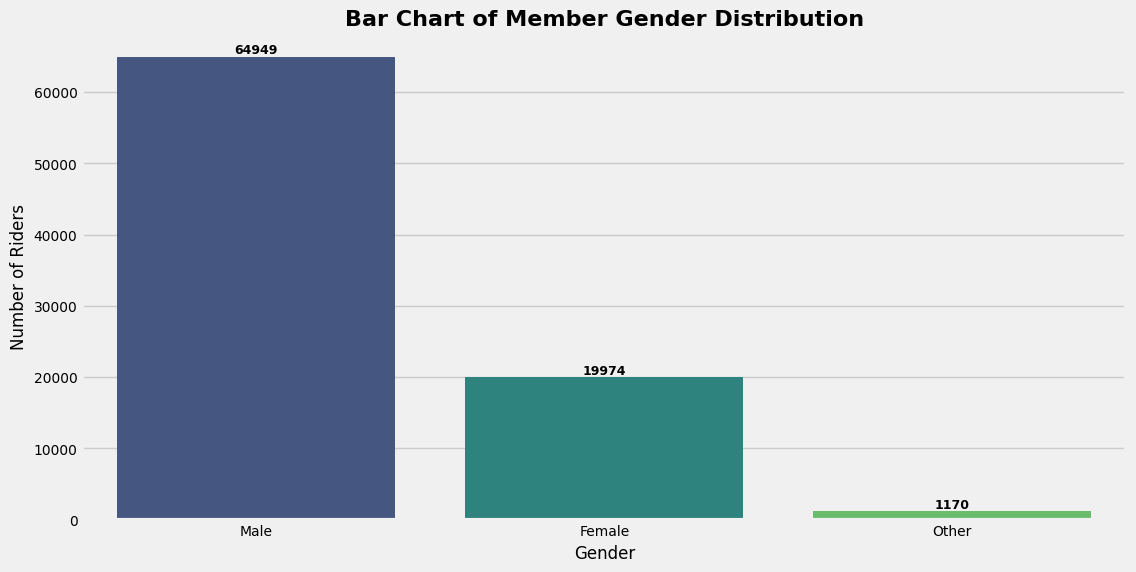

In [24]:
# Chart - 3 visualization code
# Member Gender Distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=df['member_gender'].value_counts().index, y=df['member_gender'].value_counts().values, palette='viridis')
for i, v in enumerate(df['member_gender'].value_counts().values):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=9, fontweight='bold', color='black')
plt.title('Bar Chart of Member Gender Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Riders', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

##### 1. Why did you pick the specific chart?

A bar plot is ideal as it helps to identify gender participation using a simple and clear comparison.

##### 2. What is/are the insight(s) found from the chart?

Males dominate ridership, with females underrepresented.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact -**
Yes, it highlights opportunity to target female riders through safety or awareness campaigns.

**Negative Insight -**
Gender imbalance could be a sign of safety or comfort issues for female riders.



#### Chart - 4 - Member Age Distribution

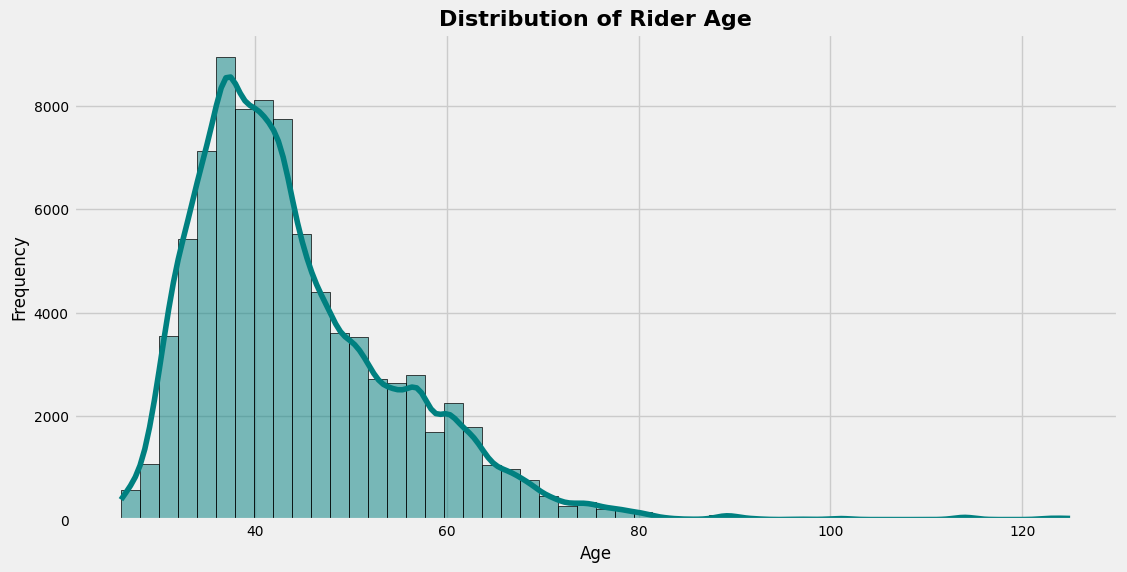

In [25]:
# Chart - 4 visualization code
# Member Age Distribution
# Create histogram
plt.figure(figsize=(12, 6))
sns.histplot(df['age'], bins=50, color='teal', edgecolor='black', kde = True)
# Add labels and title
plt.title('Distribution of Rider Age',fontsize = 16, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
# Setting font size for xticks and yticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# Show Plot
plt.show()

##### 1. Why did you pick the specific chart?

Histograms show spread and concentration of rider age.

##### 2. What is/are the insight(s) found from the chart?

Most riders are between 25-40 years old, suggesting a young working demographic.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact -**
Yes, helps tailor services (e.g., mobile apps, offers) to a tech-savvy, commuter audience.

**Negative Insight -**
May indicate under-engagement of seniors, not critical but room for inclusion.

#### Chart - 5 - Start Hour Distribution

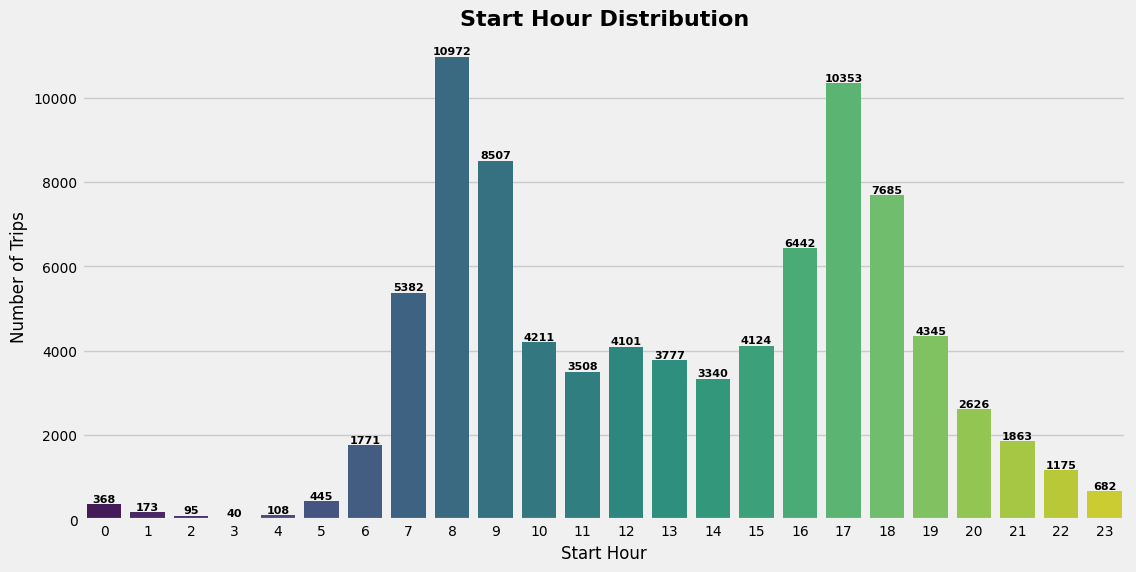

In [26]:
# Chart - 5 visualization code
# Start Hour Distribution
hourly = df['start_hour'].value_counts().sort_index()
# Create bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly.index, y=hourly.values, palette='viridis')
# Add data labels
for i, v in enumerate(hourly.values):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=8, fontweight='bold', color='black')
# Add title and labels
plt.title('Start Hour Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Start Hour', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
# Setting font size for xticks and yticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# Show Plot
plt.show()



##### 1. Why did you pick the specific chart?

Shows peak demand hours and usage patterns.

##### 2. What is/are the insight(s) found from the chart?

Peak usage occurs during 8 AM and 5-6 PM, confirming commute-driven behavior.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact -**
Yes, helps optimize fleet positioning and maintenance outside peak times.

**Negative Insight -**
No, but over-reliance on rush hours can risk under-utilization during other hours.

#### Chart - 6 - Start Day of Week Distribution

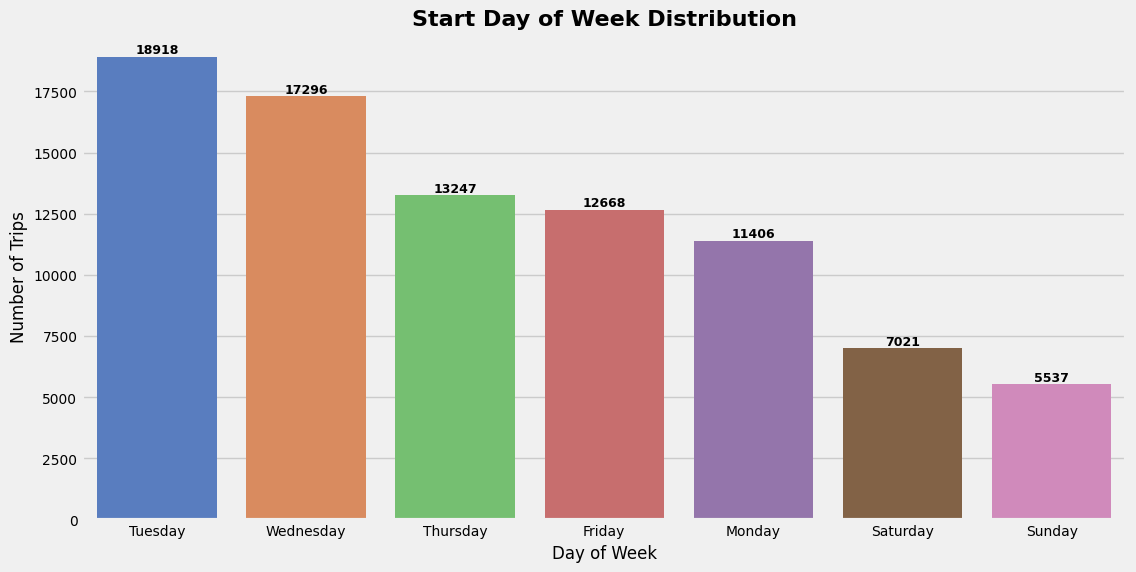

In [27]:
# Chart - 6 visualization code
# Start Day of Week Distribution
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# Create bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=df['start_day'].value_counts().index, y=df['start_day'].value_counts().values, palette='muted')
# Add data labels
for i, v in enumerate(df['start_day'].value_counts().values):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=9, fontweight='bold', color='black')
# Add labels and title
plt.title('Start Day of Week Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
# Setting font size for xticks and yticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# Show Plot
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart effectively shows the distribution of rides across each day, making it easy to identify peak days and behavioral patterns.

##### 2. What is/are the insight(s) found from the chart?

Most rides happen on weekdays, especially Tuesday to Thursday, indicating heavy use for weekday commuting.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact -**
Yes, it informs operational planning—more bikes and support staff can be allocated during peak weekday hours.

**Negative Insight -**
Lower usage on weekends may indicate missed leisure ride opportunities. It’s not a negative, but a business growth area.

#### Chart - 7 - Top 10 Start Stations

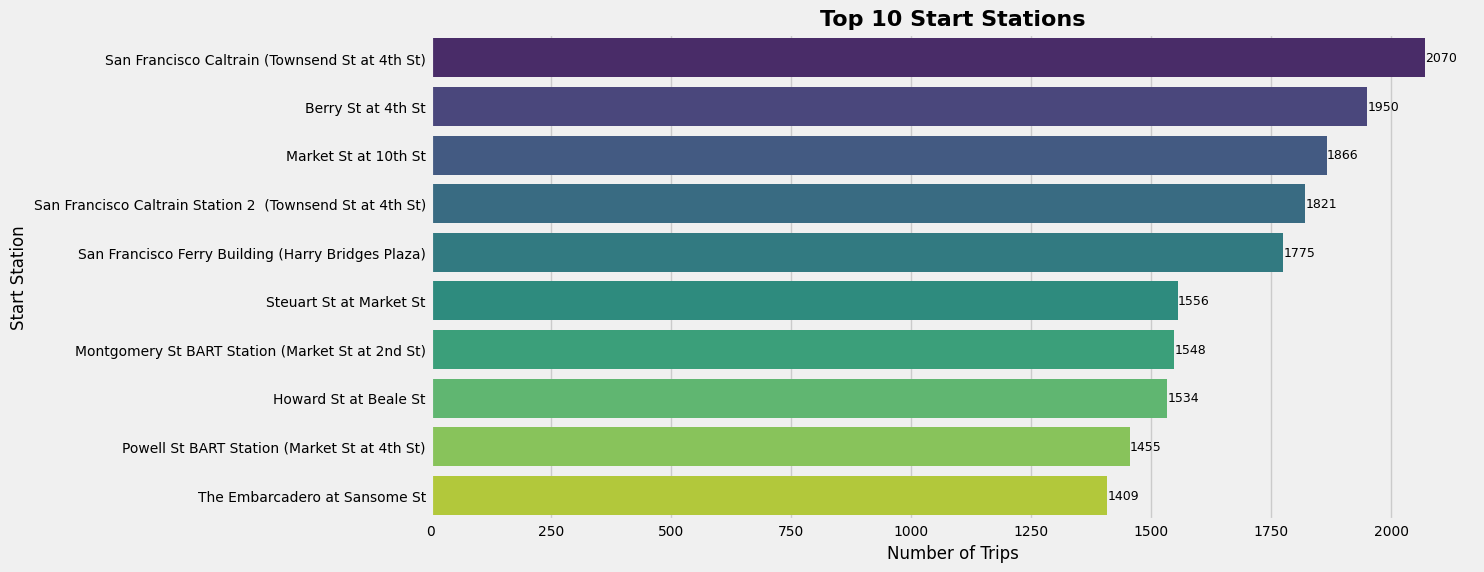

In [28]:
# Chart - 7 visualization code
# Top 10 Start Stations
top_starts = df['start_station_name'].value_counts().nlargest(10)
# Create bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_starts.values, y=top_starts.index, palette='viridis')
# Add data labels
for i, v in enumerate(top_starts.values):
    plt.text(v, i, str(v), ha='left', va='center', fontsize=9)
# Add labels and title
plt.title('Top 10 Start Stations', fontsize=16, fontweight='bold')
plt.xlabel('Number of Trips', fontsize=12)
plt.ylabel('Start Station', fontsize=12)
# Setting font size for xticks and yticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# Show Plot
plt.show()





##### 1. Why did you pick the specific chart?

A vertical bar chart displays the top-performing stations clearly, even with long names.

##### 2. What is/are the insight(s) found from the chart?

Certain stations dominate as popular starting points—often located in commercial or transit-dense areas.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact -**
Yes, these stations can be prioritized for bike availability, rebalancing, and marketing.

**Negative Insight -**
Over-reliance on a few stations might strain infrastructure; expansion of underutilized stations could balance usage.

#### Chart - 8 - Top 10 End Stations

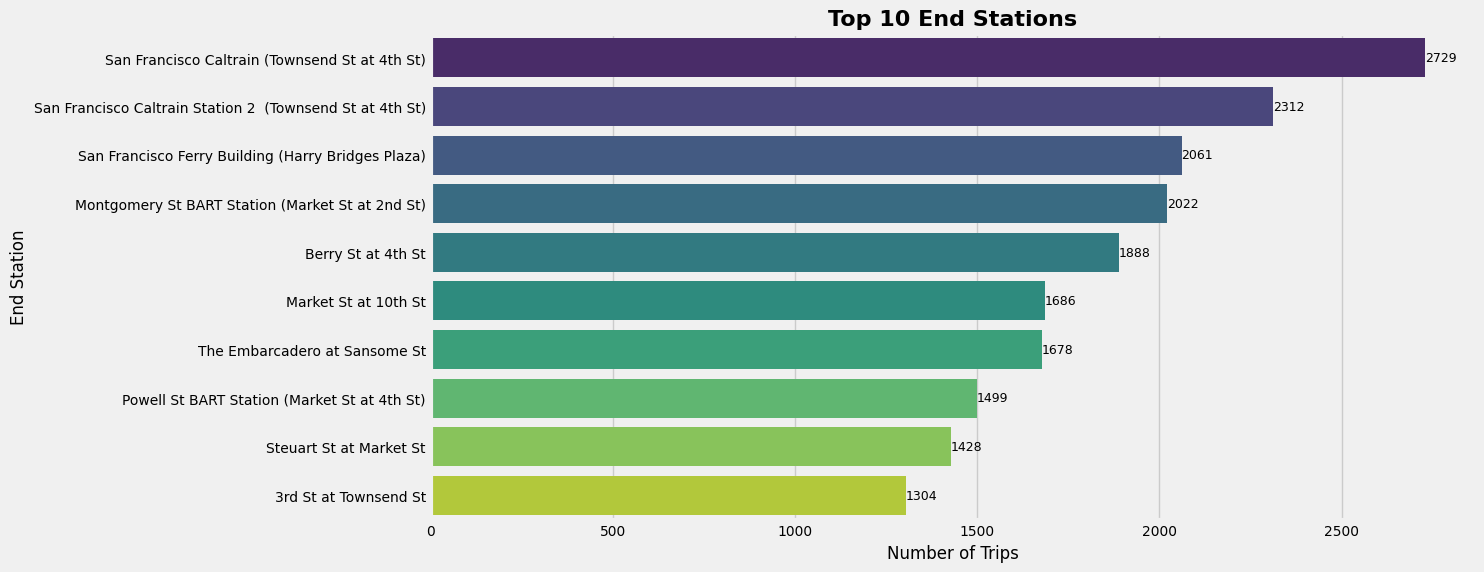

In [29]:
# Chart - 8 visualization code
# Top 10 End Stations
top_ends = df['end_station_name'].value_counts().nlargest(10)
# Create bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_ends.values, y=top_ends.index, palette='viridis')
# Add data labels
for i, v in enumerate(top_ends.values):
    plt.text(v, i, str(v), ha='left', va='center', fontsize=9)
# Add labels and title
plt.title('Top 10 End Stations', fontsize=16, fontweight='bold')
plt.xlabel('Number of Trips', fontsize=12)
plt.ylabel('End Station', fontsize=12)
# Setting font size for xticks and yticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# Show Plot
plt.show()


##### 1. Why did you pick the specific chart?

Like the previous chart, it highlights most common destinations using a clean, comparative format.

##### 2. What is/are the insight(s) found from the chart?

Popular drop-off points align closely with start stations, suggesting frequent round-trips or commuter corridors.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact -**
Yes, end-station data helps optimize bike docking, availability, and customer satisfaction.

**Negative Insight -**
If end stations are overloaded compared to start stations, it could cause operational imbalance (bike shortages).

####**Bivariate Analysis**

#### Chart - 9 - Trips by Day of Week (Split by User Type)

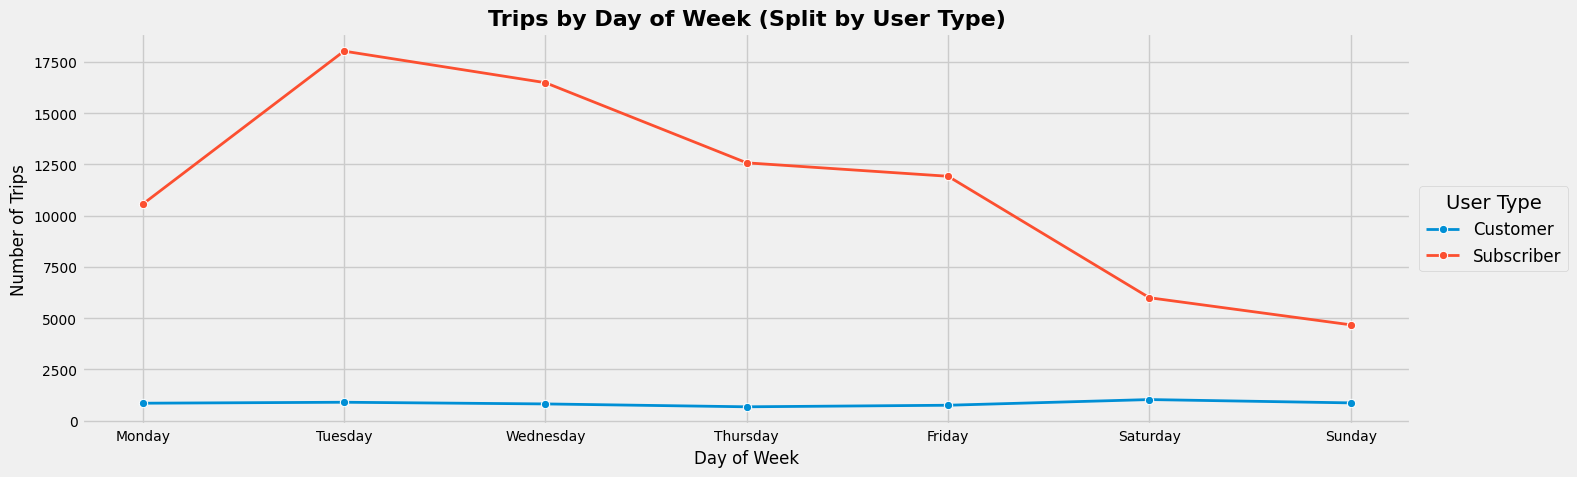

In [30]:
# Chart - 9 visualization code
# Define the order of the days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Group the data by 'start_day' and 'user_type' to get the trip counts, and ensure day_order is followed
day_user = df.groupby(['start_day', 'user_type']).size().unstack().reindex(day_order)

# Create the line plot using Seaborn
plt.figure(figsize=(16, 5))  # Set the figure size
sns.lineplot(data=day_user, markers='o', dashes=False, linewidth=2)

# Add labels and title
plt.title('Trips by Day of Week (Split by User Type)', fontsize=16, fontweight='bold')  # Title of the chart
plt.xlabel('Day of Week', fontsize=12)  # X-axis label
plt.ylabel('Number of Trips', fontsize=12)  # Y-axis label

# Setting font size for x and y ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Align the legend properly
plt.legend(title='User Type', loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

# Show plot
plt.tight_layout()  # Ensure everything fits well
plt.show()

##### 1. Why did you pick the specific chart?

A line chart is ideal for visualizing trends over a categorical sequence like days of the week. Splitting by user type (e.g., Subscriber vs Customer) makes it easy to compare usage patterns across user segments.

##### 2. What is/are the insight(s) found from the chart?

* Subscribers tend to use bikes heavily on weekdays (especially Tuesday to Thursday), suggesting regular commuting behavior.

* Customers show more activity on weekends, indicating casual or recreational use.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact -**

Yes, it allows Ford GoBike to tailor their services:
 * Prioritize bike availability and support staff during weekdays for subscribers.
 * Plan promotions, events, or tourist-targeted offers for weekends to attract customers.

**Negative Insight -**

The relatively low weekday engagement by customers could indicate a missed opportunity. By understanding this gap, the business can target strategies to encourage casual weekday riders (e.g., discounts or partnerships with local businesses).

#### Chart - 10 - Trip Duration by User Type (Box Plot)

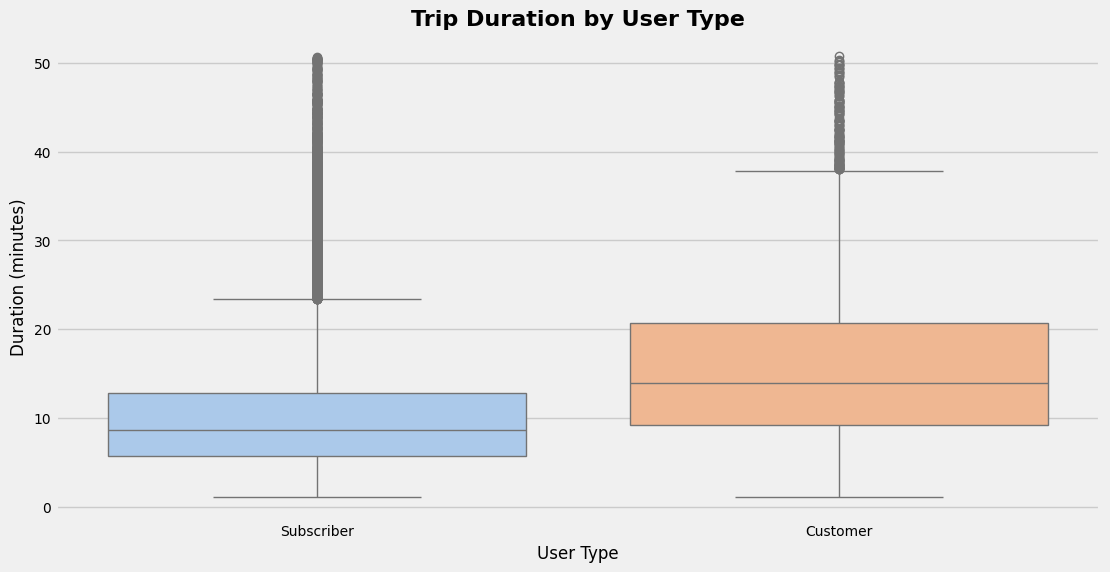

In [31]:
# Chart - 10 visualization code
# Trip Duration by User Type
# Create box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='user_type', y='duration_min', data=df, palette='pastel')
# Add title and labels
plt.title('Trip Duration by User Type', fontsize=16, fontweight='bold')
plt.xlabel('User Type', fontsize=12)
plt.ylabel('Duration (minutes)', fontsize=12)
# Set xticks and yticks font size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# Show Plot
plt.show()

##### 1. Why did you pick the specific chart?

A box plot is ideal for visualizing the distribution, spread, and outliers in trip durations across user types. It highlights medians, quartiles, and variability at a glance.

##### 2. What is/are the insight(s) found from the chart?

* Customers tend to have longer and more variable trip durations compared to Subscribers, whose trips are shorter and more consistent.

* Customers show more extreme outliers, possibly indicating exploratory or recreational rides.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact -**
Yes. It gives clear signals about user behavior:
 * Subscribers likely use the service for short, regular commutes.
 * Customers may benefit from targeted plans that accommodate longer, flexible trips—e.g., daily passes or weekend bundles.

**Negative Insight -**
Not necessarily negative, but the high variability and outliers in customer trips may imply irregular usage patterns. If not planned for (e.g., ensuring bike availability for extended durations), it could strain inventory and impact customer experience.





#### Chart - 11 - Trip Count by Hour (Split by Gender)

<Figure size 1800x600 with 0 Axes>

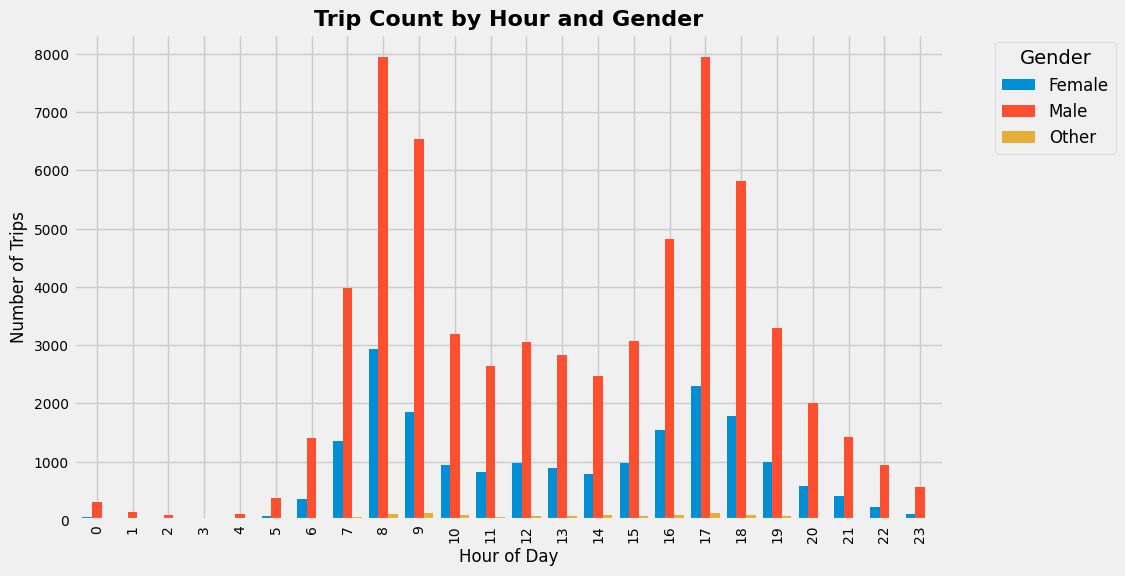

In [32]:
# Chart - 11 visualization code
# Group the data by 'start_hour' and 'member_gender' to count trips by hour and gender
hour_gender = df.groupby(['start_hour', 'member_gender']).size().unstack(fill_value=0)

# Create a bar plot for the trip count by hour, split by gender
plt.figure(figsize=(18, 6))  # Set the size of the figure
hour_gender.plot(kind='bar', stacked=False, figsize=(10, 6), width=0.8)

# Add titles and labels
plt.title('Trip Count by Hour and Gender', fontsize=16, fontweight = 'bold')
plt.xlabel('Hour of Day', fontsize=12)  # X-axis label
plt.ylabel('Number of Trips', fontsize=12)  # Y-axis label

# Align the legend to the top-right corner
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

# Set xticks and yticks font size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.show()



##### 1. Why did you pick the specific chart?

A bar chart provides a clear, comparative view of ride frequency across each hour of the day. Splitting it by gender adds a valuable demographic dimension to understand who rides when.

##### 2. What is/are the insight(s) found from the chart?

* Peak trip counts are observed during morning (7–9 AM) and evening (4–6 PM), indicating commute patterns.

* Male users dominate the rides across most hours, especially during commuting times.

* Female and other gender categories show a smaller, more evenly spread riding pattern.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact -**

Yes, these patterns can inform:
 * Operational decisions like when to rebalance bikes.
 * Gender-targeted marketing (e.g., safety awareness or incentives for female riders during off-peak hours).
 * Infrastructure planning to support commuter-heavy hours.

**Negative Impact -**

The gender imbalance significantly fewer female riders may point to safety concerns or lack of targeted outreach. Addressing this could expand user diversity and grow ridership.

#### Chart - 12 - Age by User Type

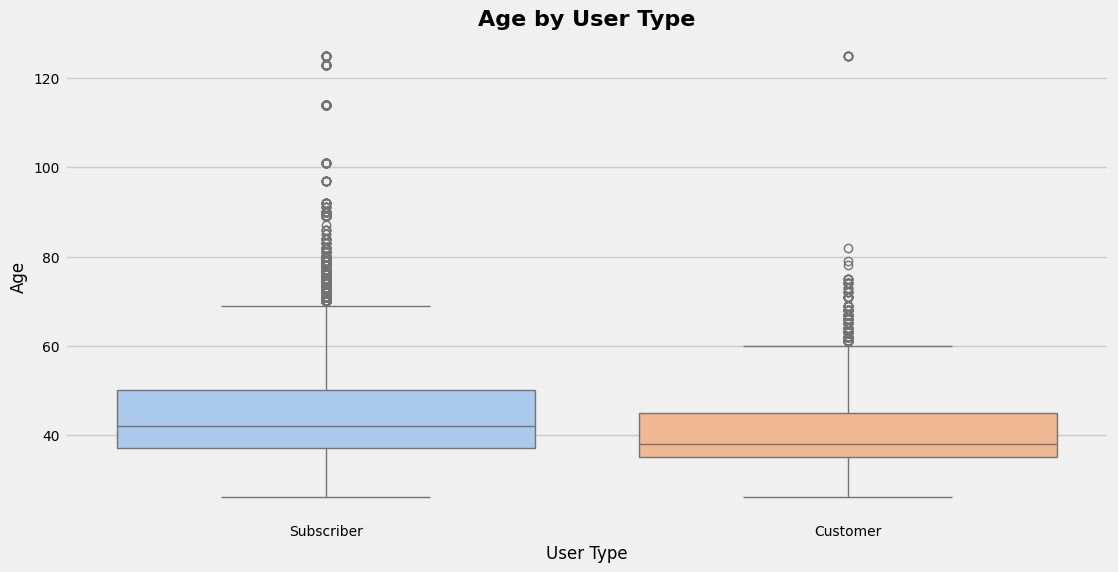

In [33]:
# Chart - 12 visualization code
# Age by User Type
# Create box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='user_type', y='age', data=df, palette='pastel')
# Add title and labels
plt.title('Age by User Type', fontsize=16, fontweight='bold')
plt.xlabel('User Type', fontsize=12)
plt.ylabel('Age', fontsize=12)
# Set xticks and yticks font size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# Show Plot
plt.show()

##### 1. Why did you pick the specific chart?

A box plot is effective for comparing age distributions across user types. It reveals medians, ranges, and outliers, making it easy to spot demographic trends and differences.

##### 2. What is/are the insight(s) found from the chart?

* Subscribers generally fall into a narrower and younger age range (mostly mid-20s to mid-40s), indicating a strong working professional base.

* Customers show a wider age range, including older users, suggesting more occasional or leisure-based use.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact -**

Yes. This insight enables:
* Tailored marketing—focus professional commuting plans toward the dominant subscriber age group.
* Diversification strategies—design campaigns or services attractive to older or casual riders (e.g., guided tours, senior discounts).

**Negative Insight -**

The lack of younger or older subscribers might hint at unmet needs or barriers (e.g., pricing or accessibility). Addressing these could unlock new user segments and expand the service's reach.

#### Chart - 13 - Trip Duration by Gender

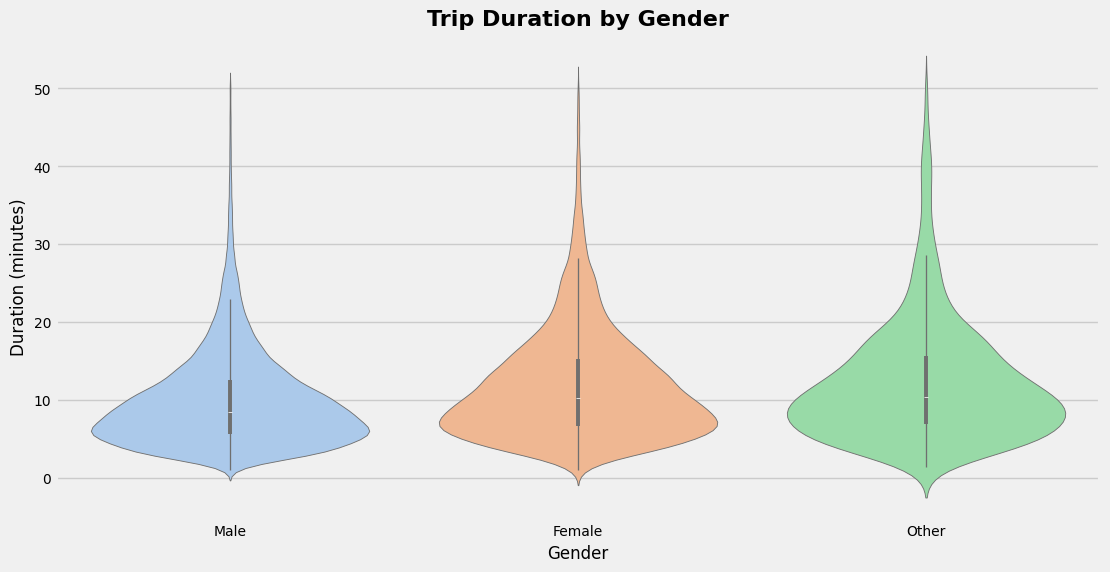

In [34]:
# Chart - 13 visualization code
# Trip Duration by Gender
# Create violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='member_gender', y='duration_min', data=df, palette='pastel')
# Add labels and title
plt.title('Trip Duration by Gender', fontsize=16, fontweight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Duration (minutes)', fontsize=12)
# Set xticks and yticks font size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# Show plot
plt.show()


##### 1. Why did you pick the specific chart?

A violin plot combines the benefits of a box plot and a kernel density plot. It not only shows the spread and median of trip durations but also gives a visual sense of the distribution shape for each gender category. This helps in spotting asymmetry or concentration of trip durations.

##### 2. What is/are the insight(s) found from the chart?

* Male and female riders have fairly similar median trip durations, but female riders show slightly more variation.

* The "Other"/Unspecified gender group shows more dispersed durations and noticeable outliers, suggesting less consistent trip behavior or possibly a smaller sample size.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact -**

Yes. Understanding trip behavior by gender helps the company:
 * Refine service offerings or communication strategies to better align with how different genders use the service.
 * Recognize patterns that might indicate barriers or unique usage needs, which could be addressed to improve user experience.

**Negative Insight -**

The wider variability in trip durations for the "Other" category could indicate less predictability in how this group uses the system. This might point to a lack of tailored service offerings or accessibility gaps that could be limiting consistent usage.

#### Chart - 14 - Average Trip Duration by Start Day of Week

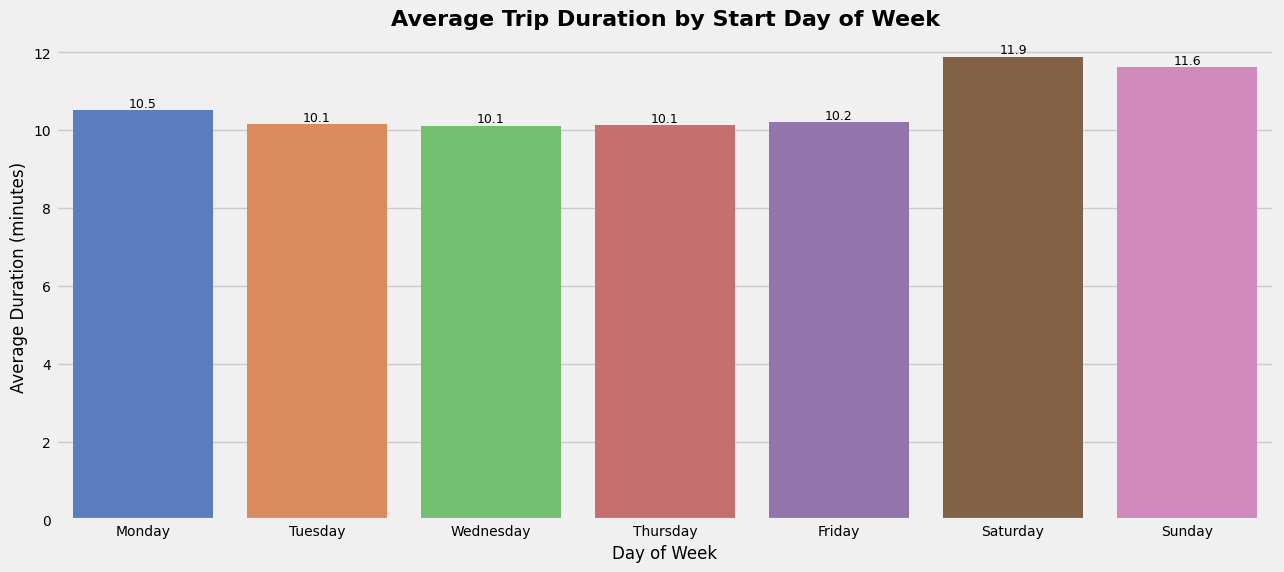

In [35]:
# Chart - 14 visualization code
# Average Trip Duration by Start Day of Week
avg_duration = df.groupby('start_day')['duration_min'].mean().reindex(day_order)
# Create bar plot
plt.figure(figsize=(14, 6))
sns.barplot(x=avg_duration.index, y=avg_duration.values, palette='muted')
# Add data labels
for i, v in enumerate(avg_duration.values):
    plt.text(i, v, str(round(v, 1)), ha='center', va='bottom', fontsize=9, color='black')
# Add labels and title
plt.title('Average Trip Duration by Start Day of Week', fontsize=16, fontweight='bold')
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Average Duration (minutes)', fontsize=12)
# Setting font size for xticks and yticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# Show Plot
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is ideal for comparing average values across categorical variables. In this case, it clearly shows how trip duration varies from Monday to Sunday, helping uncover behavioral trends tied to the day of the week.

##### 2. What is/are the insight(s) found from the chart?

* Weekends (Saturday and Sunday) show higher average trip durations compared to weekdays, indicating more leisure or exploratory rides.

* Weekdays, especially Tuesday to Thursday, have shorter average durations, likely reflecting structured commute patterns.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact -**

Yes. These insights support operational and marketing decisions:
* Weekday focus on efficiency and quick bike turnover for commuters.
* Weekend offerings like all-day passes or event partnerships targeting tourists and casual riders.

**Negative Insight -**

Longer average durations on weekends could lead to bike unavailability or shortages if inventory isn’t adjusted. This insight helps preemptively address such issues by improving redistribution strategies and resource planning.

#### Chart - 15 - Average Trip Duration by Start Hour

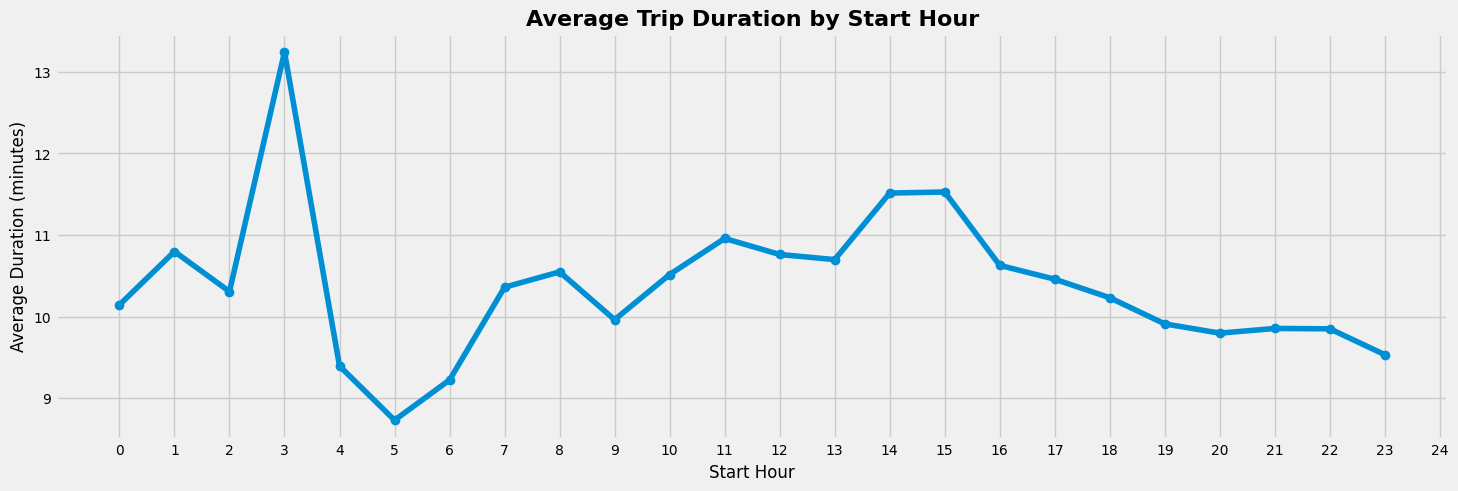

In [36]:
# Chart - 15 visualization code
# Average Trip Duration by Start Hour
# Calculate average trip duration by hour
avg_duration_by_hour = df.groupby('start_hour')['duration_sec'].mean().reset_index()

# Convert duration from seconds to minutes for easier understanding
avg_duration_by_hour['duration_min'] = avg_duration_by_hour['duration_sec'] / 60

# Create line plot
plt.figure(figsize=(16, 5))
plt.plot(avg_duration_by_hour['start_hour'], avg_duration_by_hour['duration_min'], marker='o', linestyle='-')
# Show all xticks values
plt.xticks(range(25))
# Add labels and title
plt.title('Average Trip Duration by Start Hour', fontsize=16, fontweight='bold')
plt.xlabel('Start Hour', fontsize=12)
plt.ylabel('Average Duration (minutes)', fontsize=12)
# Set xticks and yticks font size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# Show Plot
plt.show()

##### 1. Why did you pick the specific chart?

A line chart is great for visualizing continuous trends—here, it helps observe how average trip duration changes across 24 hours. Plotting it over time (hourly) makes it easy to spot peaks and drops throughout the day.

##### 2. What is/are the insight(s) found from the chart?

* Average trip duration tends to peak early morning (around 5-7 AM) and late at night (after 9 PM), likely due to leisure or non-commuting trips.

* Midday to early evening (10 AM - 7 PM) shows more consistent, slightly shorter trip durations, likely influenced by work or errand-based usage.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact -**

Yes.
* The company can plan dynamic pricing or promotions during low-usage hours.
* Support fleet rebalancing efforts by knowing when longer trips are likely.
* Design personalized offers based on user trip patterns (e.g., incentives for off-peak travel).

**Negative Insight -**

Possibly. If long trips during odd hours go unaddressed (e.g., no rebalancing or bike availability), it may lead to stockouts or delays, harming user satisfaction. These need to be monitored and managed proactively.

####**Multivariate Analysis**

#### Chart - 16 - User Type by Gender and Day of Week

<Figure size 1600x600 with 0 Axes>

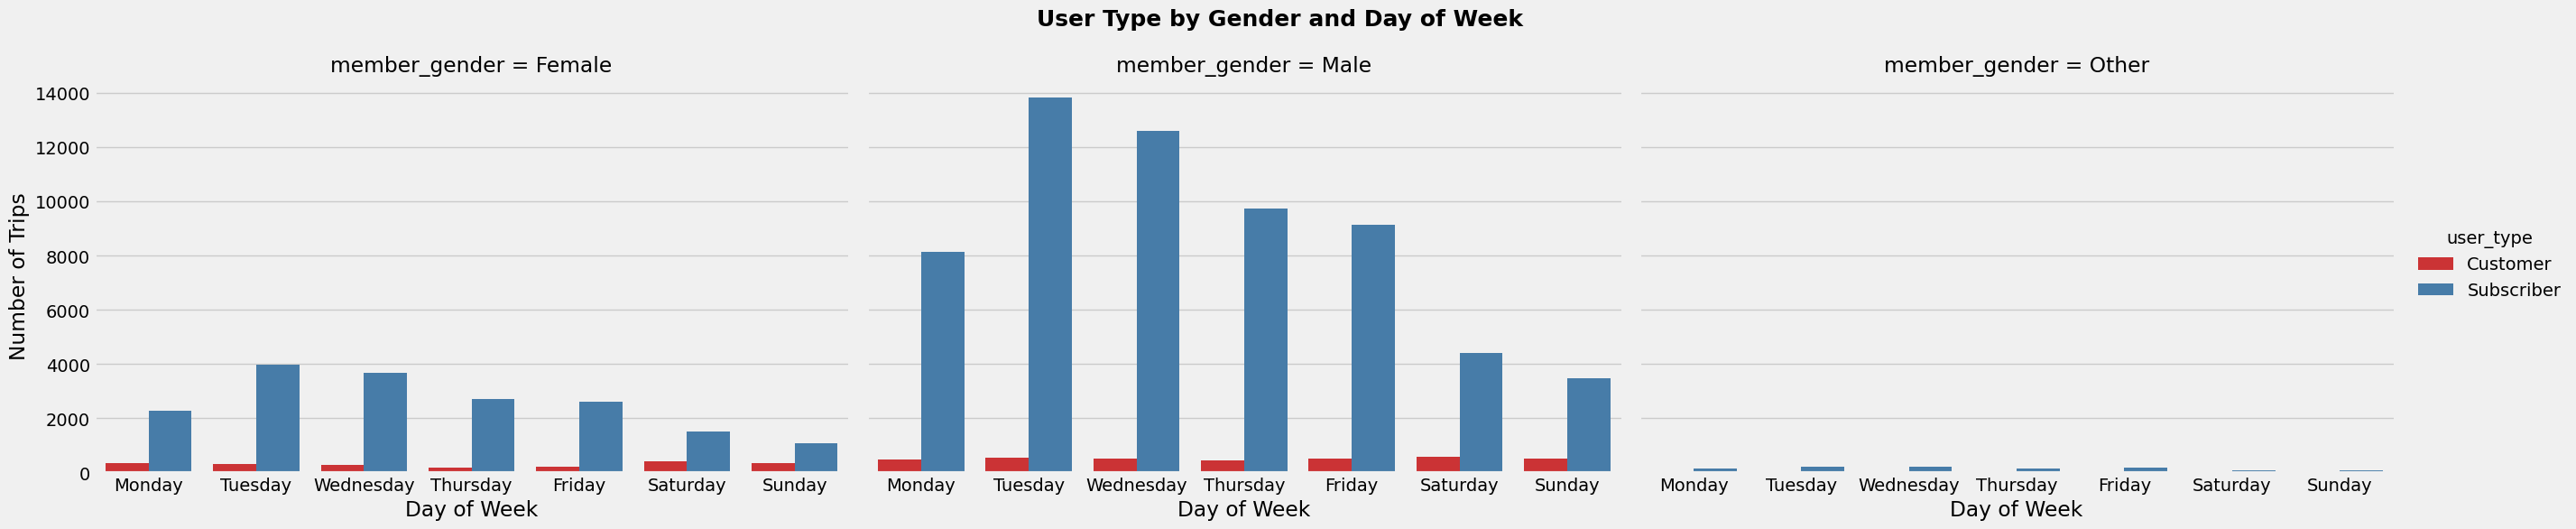

In [37]:
# Chart - 16 visualization code
# Grouping the data by 'start_day', 'member_gender', and 'user_type' to count the number of trips
multi_df = df.groupby(['start_day', 'member_gender', 'user_type']).size().reset_index(name='count')

# Filter out rows where gender is missing (optional step if the data has missing gender values)
multi_df = multi_df[multi_df['member_gender'].notna()]

# Ensure the days are in the correct order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
multi_df['start_day'] = pd.Categorical(multi_df['start_day'], categories=day_order, ordered=True)

# Create a grouped bar plot using Seaborn
plt.figure(figsize=(16, 6))  # Set the figure size

# FacetGrid for gender, so each gender is plotted in a separate subplot
g = sns.catplot(data=multi_df, x='start_day', y='count', hue='user_type', col='member_gender', kind='bar',
                height=6, aspect=1.5, palette='Set1', dodge=True, hue_order=['Customer', 'Subscriber'])
# Setting x-axis and y-axis labels
g.set_xlabels('Day of Week')
g.set_ylabels('Number of Trips')
# Add title and adjust layout
g.fig.suptitle('User Type by Gender and Day of Week', fontsize=18, fontweight='bold')
g.fig.subplots_adjust(top=0.85)  # Adjust title placement to fit with the subplots


# Show plot
plt.show()


##### 1. Why did you pick the specific chart?

A grouped bar plot is ideal for comparing multiple categorical variables. In this case, it visually contrasts user types (Customer vs. Subscriber) across gender and day of the week. This format makes it easier to identify usage trends and disparities between groups over time.

##### 2. What is/are the insight(s) found from the chart?

* Subscribers dominate across all genders, especially on weekdays, confirming that subscribers are more likely commuters.

* Customers show increased activity on weekends, particularly among female riders, indicating more recreational or flexible use.

* Male riders are the most active across both user types, but the gender gap slightly narrows during the weekend.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact -**

Yes. This visualization can:
* Guide targeted marketing strategies—e.g., promoting weekend passes or tourist packages to customer-type users, especially females.

* Inform operational planning—adjust bike availability and maintenance cycles based on expected user load by type and gender.

* Help build personalized communication—like offering subscription incentives to frequent female weekend riders.



**Negative Insight -**

Yes, potentially:

* The gender imbalance (lower female participation during weekdays) may indicate barriers like safety, route awareness, or convenience.

* Overdependence on subscribers for weekday usage may lead to vulnerability if subscriber numbers drop due to alternative commuting options.

#### Chart - 17 - Age vs. Trip Duration by Gender & User Type

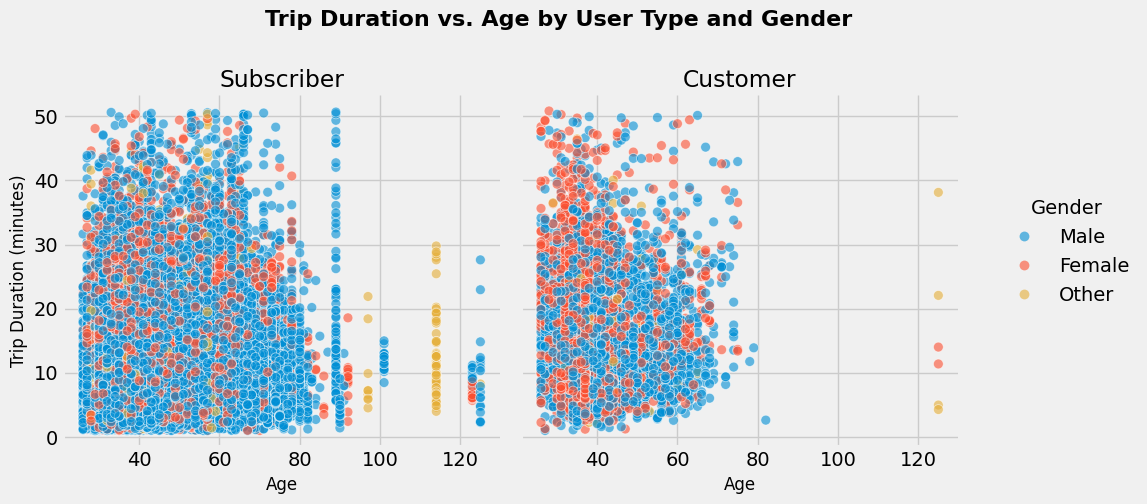

In [38]:
# Chart - 17 visualization code
# Age vs. Trip Duration by Gender & User Type
# Filter out outliers for clarity
filtered_df = df[(df['age'] > 0) & (df['duration_min'] < 120)].copy()

# Create a FacetGrid scatter plot: age vs. trip duration, colored by gender, faceted by user type
g = sns.relplot(
    data=filtered_df,
    x='age',
    y='duration_min',
    hue='member_gender',
    col='user_type',
    kind='scatter',
    height=5,
    aspect=1,
    alpha=0.6,       # Marker transparency
    s=50             # Marker size
)
# Add space between title and plot
g.fig.subplots_adjust(top=0.85)
# Add overall title
g.fig.suptitle(
    'Trip Duration vs. Age by User Type and Gender',
    fontsize=16,
    fontweight='bold',
    y=1.02           # Push title up above the plots
)
# Set xticks and yticks font size
g.set_xlabels('Age', fontsize=12)
g.set_ylabels('Trip Duration (minutes)', fontsize=12)
# Set axis labels
g.set_axis_labels('Age', 'Trip Duration (minutes)')

# Adjust individual facet titles (optional styling)
g.set_titles('{col_name}')

# Customize the legend: title and border
legend = g._legend
legend.set_title('Gender')
legend.get_frame().set_edgecolor('black')
legend.get_frame().set_linewidth(1)



# Display the plot
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot is best for visualizing relationships between two continuous variables—here, age and trip duration. Coloring by gender and splitting by user type adds a powerful dimension for comparative analysis. This helps reveal patterns, clusters, or outliers across demographics and usage types.

##### 2. What is/are the insight(s) found from the chart?

* Trip duration generally decreases with increasing age, especially for subscribers, suggesting younger users take longer, possibly more exploratory trips.

* Customers show more variation in duration across all ages, indicating less structured ride behavior.

* Female riders tend to cluster in the mid-age range with moderate durations, while male riders dominate across broader age and duration ranges.

* Outliers are present, especially among customers—some users (regardless of gender) have very long trips, possibly tourists or infrequent riders.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact -**

Yes.
* Helps the company tailor marketing and promotions: e.g., adventure packages for younger riders or short-trip commuter deals for older subscribers.

* Enables user experience improvements by designing better ride plans or app features suited to common age-duration patterns.

* Reveals potential new user segments like young female customers who may be underrepresented and can be engaged more actively.


**Negative Insight -**

Yes, potentially:

* The lack of older customers with longer trips may signal that current offerings don't appeal to or accommodate them. This could be a missed revenue opportunity.

* If outliers with very long durations represent lost or misused bikes, it could lead to asset misuse or availability issues, affecting overall service efficiency.



#### Chart - 18 - Correlation Heatmap

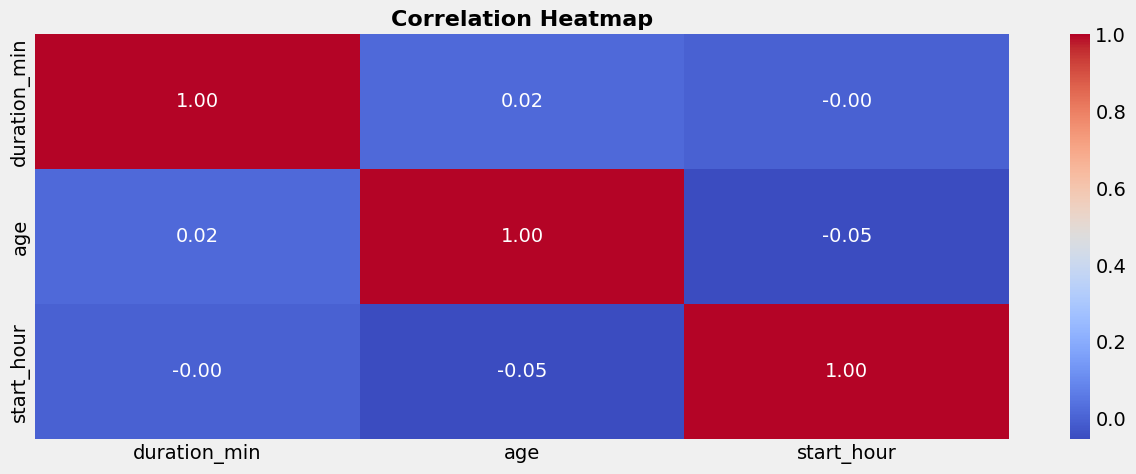

In [39]:
# Correlation Heatmap visualization code
# Selecting only numeric columns for correlation
numeric_cols = df[['duration_min', 'age', 'start_hour']]

# Correlation matrix
corr_matrix = numeric_cols.corr()

# Plot using seaborn
plt.figure(figsize=(14, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')   # Create heatmap
# Add title
plt.title('Correlation Heatmap', fontweight = 'bold', fontsize = 16)
# Show plot
plt.show()

##### 1. Why did you pick the specific chart?

A correlation heatmap is chosen to visualize the strength and direction of linear relationships between multiple numerical variables. It gives an immediate overview of which features are potentially influencing each other, and how strong that influence is.

##### 2. What is/are the insight(s) found from the chart?

* duration_min vs age: Weak positive correlation — older users don’t take significantly longer or shorter trips.

* duration_min vs start_hour: Near-zero correlation — trip duration doesn’t vary meaningfully with the hour of the day.

* age vs start_hour: Slight negative correlation — older users slightly tend to avoid peak trip hours, but it's very minimal.

Overall, none of the numerical variables show any strong linear relationship with each other.



#### Chart - 19 - Pair Plot

<Figure size 1200x500 with 0 Axes>

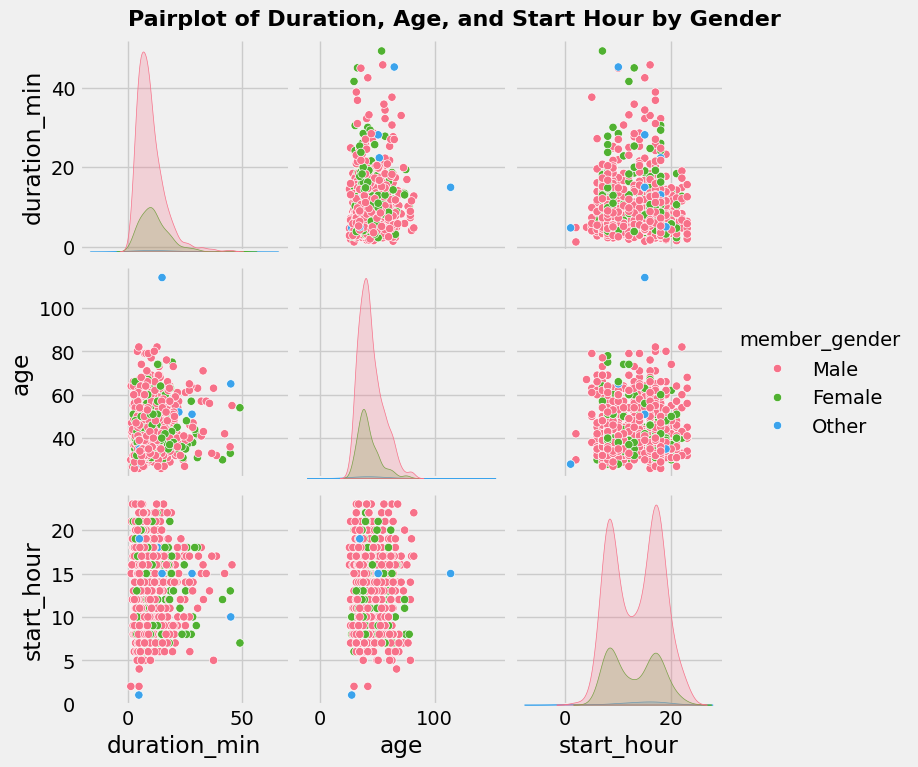

In [40]:
# Pair Plot visualization code
# Sample the dataset to keep the pairplot fast and readable
sample_df = df[['duration_min', 'age', 'start_hour', 'member_gender']].dropna().sample(1000, random_state=42)
# Set figure size
plt.figure(figsize=(12, 5))
# Convert gender to categorical for coloring
sns.pairplot(sample_df, hue='member_gender', diag_kind='kde', palette='husl')
# Add title
plt.suptitle('Pairplot of Duration, Age, and Start Hour by Gender', y=1.02, fontweight = 'bold', fontsize = 16)
# Show plot
plt.show()


##### 1. Why did you pick the specific chart?

A pairplot is ideal when exploring pairwise relationships between multiple numerical features, especially when segmented by a categorical feature like gender. It allows us to visually assess distributions and potential correlations in a compact matrix form, while also comparing patterns across genders.

##### 2. What is/are the insight(s) found from the chart?

* Trip Duration vs Age: Both males and females show a wide spread across age groups for trip durations, but no visible strong trend — suggesting duration is not strongly age-dependent.

* Start Hour vs Age: No clear pattern, indicating trip start times are spread fairly evenly across age groups.

* Duration vs Start Hour: There’s a slight concentration of shorter trips during peak hours for both genders, but not significantly different between them.

* Distribution Differences: The distribution of age and start hour is fairly consistent across genders, but trip duration appears slightly more varied for males.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

1. **Focus on Subscriber Retention & Growth :**

Since Subscribers form the majority of the user base, and they consistently show higher ride frequency and shorter trip durations (indicating utility usage), prioritize:

 * Retention strategies: Loyalty programs, renewal discounts, referral incentives.
 * Conversion of casual customers to subscribers through trial passes and promotions.

2. **Optimize Bike Availability by Time and Location :**

The analysis showed peak usage during morning and evening commute hours and specific high-traffic stations. Use this to:

 * Strategically rebalance bikes across top start/end stations.
 * Implement dynamic reallocation schedules aligned with hourly usage trends.

3. **Enhance Targeting Based on Gender & Age Segments :**

Though trip patterns across gender and age didn't show strong variation, segment-level marketing can still be valuable:

 * Offer youth-focused campaigns and student discounts (as younger users have relatively higher usage).
 * Develop safety or comfort features that appeal to female riders, encouraging more balanced usage.

4. **Improve Trip Experience Through App Features :**

Since trip durations are generally short and predictable:

 * Use in-app tools to recommend start/end stations based on user location and availability.
 * Provide real-time updates on station capacity to avoid frustration and missed trips.

5. **Seasonal Promotions and Off-Peak Incentives :**

Usage is lower in certain months or non-peak hours:

 * Introduce seasonal offers or “Happy Hour” discounts to encourage off-peak usage.
 * Partner with local events or businesses to bundle ride offers during less busy times.

6. **Monitor Underperforming Stations :**

Identify stations with consistently low usage and:

 * Investigate accessibility issues.
 * Consider relocating or marketing those locations better.



# **Conclusion**

The Ford GoBike analysis uncovered clear patterns in user behavior and trip usage. Subscribers are the primary users, mostly riding during weekday peak hours for commuting, while customers prefer weekends and longer rides, indicating recreational use.

Peak usage occurs during rush hours, and certain stations consistently experience high demand, guiding better bike distribution strategies. Young male adults (25-35) dominate ridership, suggesting a target demographic for marketing efforts.

While correlations between numeric variables were minimal, categorical insights such as user type, day of week, and gender provided stronger patterns for business action.

These insights can help Ford GoBike enhance operations, increase customer satisfaction, and grow ridership by optimizing availability, targeting promotions, and improving service in high-demand areas.